In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import re
import os
from glob import glob
import sys
# sys.path

In [342]:
file = glob(os.path.join(os.path.split(sys.path[0])[0], 'auxiliary', 'vp_poll*'))[0]

In [343]:
df_poll = pd.DataFrame()

In [386]:
pd.ExcelFile(file).sheet_names

['Sheet1', 'Sheet2', 'Sheet3', 'Sheet4', 'Sheet5']

In [470]:
def clean_date(text):
    inp = text
    if len(inp) > 12:
        try:

            text = re.findall('(\w{3})\s\d{1,2}.*?(?:(?=.*?\w+)(\w+.*?\d{4})$)', text)
            if text[0][-1][:2].isalpha():
                date = text[0][-1]
            else:
                date = ' '.join(text[0])
            return date
        except:
            print(inp)
    else:
        return inp

In [516]:
df_poll = pd.DataFrame()
for n in range(1,6):
    df = pd.read_excel(file, sheet_name = f'Sheet{n}')
    df = pd.melt(df, id_vars='Date', value_vars = df.columns[1:])
    df.columns = ['candidate', 'date', 'percentage']
    df.date = pd.to_datetime(df.date.apply(clean_date))
    df.percentage = df.percentage.apply(lambda x: x if isinstance(x, (int, float)) else np.nan)
    df.candidate = df.candidate.astype(str)
    df_poll = pd.concat([df_poll, df], axis=0)
    df_poll = df_poll.drop_duplicates(subset=['candidate', 'date']).copy()

In [517]:
cands = ['Bongbong Marcos', 'Leni Robredo']

In [518]:
df_poll.candidate.unique()
# .drop_duplicates()

array(['Lito Atienza', 'Bam Aquino', 'Benigno Aquino III', 'Kris Aquino',
       'Jejomar Binay', 'Alan Peter Cayetano', 'Miriam Defensor Santiago',
       'Franklin Drilon', 'Rodrigo Duterte', 'JV Ejercito',
       'Francis Escudero', 'Jinggoy Estrada', 'Joseph Estrada',
       'Win Gatchalian', 'Kim Henares', 'Panfilo Lacson', 'Loren Legarda',
       'Bongbong Marcos', 'Isko Moreno', 'Manny Pacquiao',
       'Francis Pangilinan', 'Grace Poe', 'Bong Revilla', 'Leni Robredo',
       'Mar Roxas', 'Vilma Santos', 'Antonio Trillanes', 'Others',
       'Refused', "Don't know", 'None', 'Albert Alba', 'Gringo Honasan',
       'Undecided/None'], dtype=object)

In [520]:
df= pd.crosstab(df_poll.candidate, df_poll.date, df_poll.percentage, aggfunc='mean').T[cands]

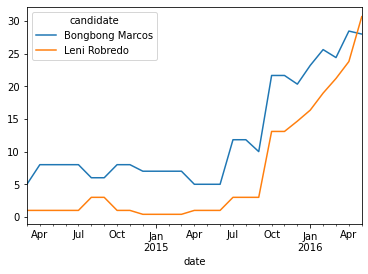

In [545]:
df.resample('M').mean().bfill().plot()

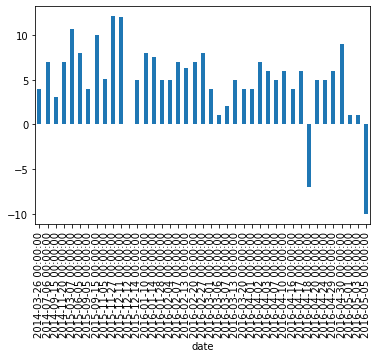

In [550]:
(df[cands[0]] - df[cands[1]]).dropna().plot(kind='bar')

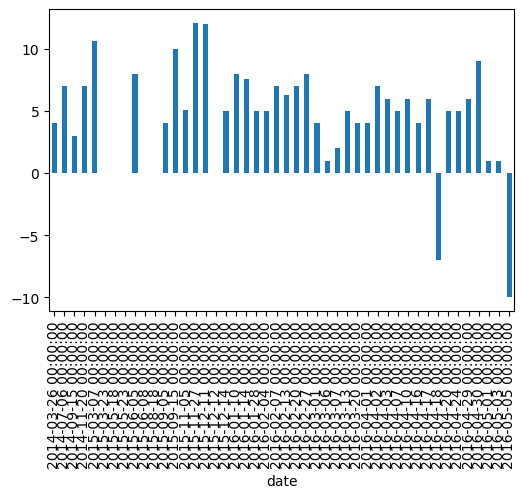

In [536]:
fig, ax = plt.subplots(dpi=100)
# df.plot(kind='bar', ax=ax)
(df[cands[0]] - df[cands[1]]).plot(kind='bar', ax=ax)

In [481]:
' '.join(text[0])

'Mar Apr 1, 2016'

In [490]:
df_poll.date.unique()

array(['2014-03-26T00:00:00.000000000', '2014-07-06T00:00:00.000000000',
       '2014-09-15T00:00:00.000000000', '2014-11-20T00:00:00.000000000',
       '2015-03-07T00:00:00.000000000', '2015-03-23T00:00:00.000000000',
       '2015-05-18T00:00:00.000000000', '2015-05-23T00:00:00.000000000',
       '2015-06-05T00:00:00.000000000', '2015-06-08T00:00:00.000000000',
       '2015-08-18T00:00:00.000000000', '2015-09-05T00:00:00.000000000',
       '2015-09-15T00:00:00.000000000', '2015-11-05T00:00:00.000000000',
       '2015-11-27T00:00:00.000000000', '2015-12-11T00:00:00.000000000',
       '2015-12-12T00:00:00.000000000', '2015-12-14T00:00:00.000000000',
       '2016-01-14T00:00:00.000000000', '2016-01-10T00:00:00.000000000',
       '2016-01-28T00:00:00.000000000', '2016-02-04T00:00:00.000000000',
       '2016-02-07T00:00:00.000000000', '2016-02-13T00:00:00.000000000',
       '2016-02-20T00:00:00.000000000', '2016-02-27T00:00:00.000000000',
       '2016-03-01T00:00:00.000000000', '2016-03-06

In [554]:
df_poll.dropna().to_csv(os.path.join(os.path.split(sys.path[0])[0], 'output', 'vp_poll.csv'), index=False)